In [23]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [3]:
hr = pd.read_csv('HR_comma_sep.csv')
hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low


In [25]:
X = hr.drop(columns='left')
y = hr.left
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3,stratify=y)

In [26]:
ohe = OneHotEncoder(drop = 'first', sparse_output=False)
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object)),
                            (ohe, make_column_selector(dtype_include=object)),
                             verbose_feature_names_out=False)

In [27]:
dtc = DecisionTreeClassifier(min_samples_leaf=5,random_state=24)
pipe = Pipeline([('CT',ct),('DTC',dtc)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018B84329D30>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018B847F6ED0>)],
                                   verbose_feature_names_out=False)),
                ('DTC',
                 DecisionTreeClassifier(min_samples_leaf=5, random_state=24))])

In [24]:
params = {  'DTC__min_samples_leaf' : [2,10,25,50],
'DTC__min_samples_split' : [1,10,25,50],
'DTC__max_depth' : [None, 4, 6]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(pipe, param_grid=params, cv = kfold, verbose=3, scoring='roc_auc')
gcv.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=2, DTC__min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=2, DTC__min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=2, DTC__min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END DTC__max_depth=None, DTC__min_samples_leaf=2, DTC__min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END DTC__max_depth=None, DTC__min_samples_leaf=2, DTC__min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=2, DTC__min_samples_split=10;, score=0.986 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=2, DTC__min_samples_split=10;, score=0.982 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=2, DTC__min_samples_split=10;, score=0.982 total time=   0.0s
[CV 4/5] 

D:\Anaconda\envs\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\envs\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\envs\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_esti

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000018B82091FA0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000018B82A954C0>)],
                                                          verbose_feature_names_out=False)),
                                       ('DTC',
                                        DecisionTreeClassifier(min_samples_leaf=5,
                                                               random_state=24))]),
             param_grid={'DTC__max_depth': [None, 4, 6],
                         'DTC__min_samples_leaf': [2, 10, 25, 50],
                         'DTC__min_samples_split': [1, 10, 25, 50]},
             scoring='roc_auc', verbose=3)

In [28]:
print(gcv.best_score_)
print(gcv.best_params_)

0.9860600914507656
{'DTC__max_depth': None, 'DTC__min_samples_leaf': 10, 'DTC__min_samples_split': 25}


In [55]:
# gcv.best_estimator_.named_steps['DTC'] or gcv.best_estimator_[1] - for accessing the pipeline name 
best_tree_model = gcv.best_estimator_.named_steps['DTC']

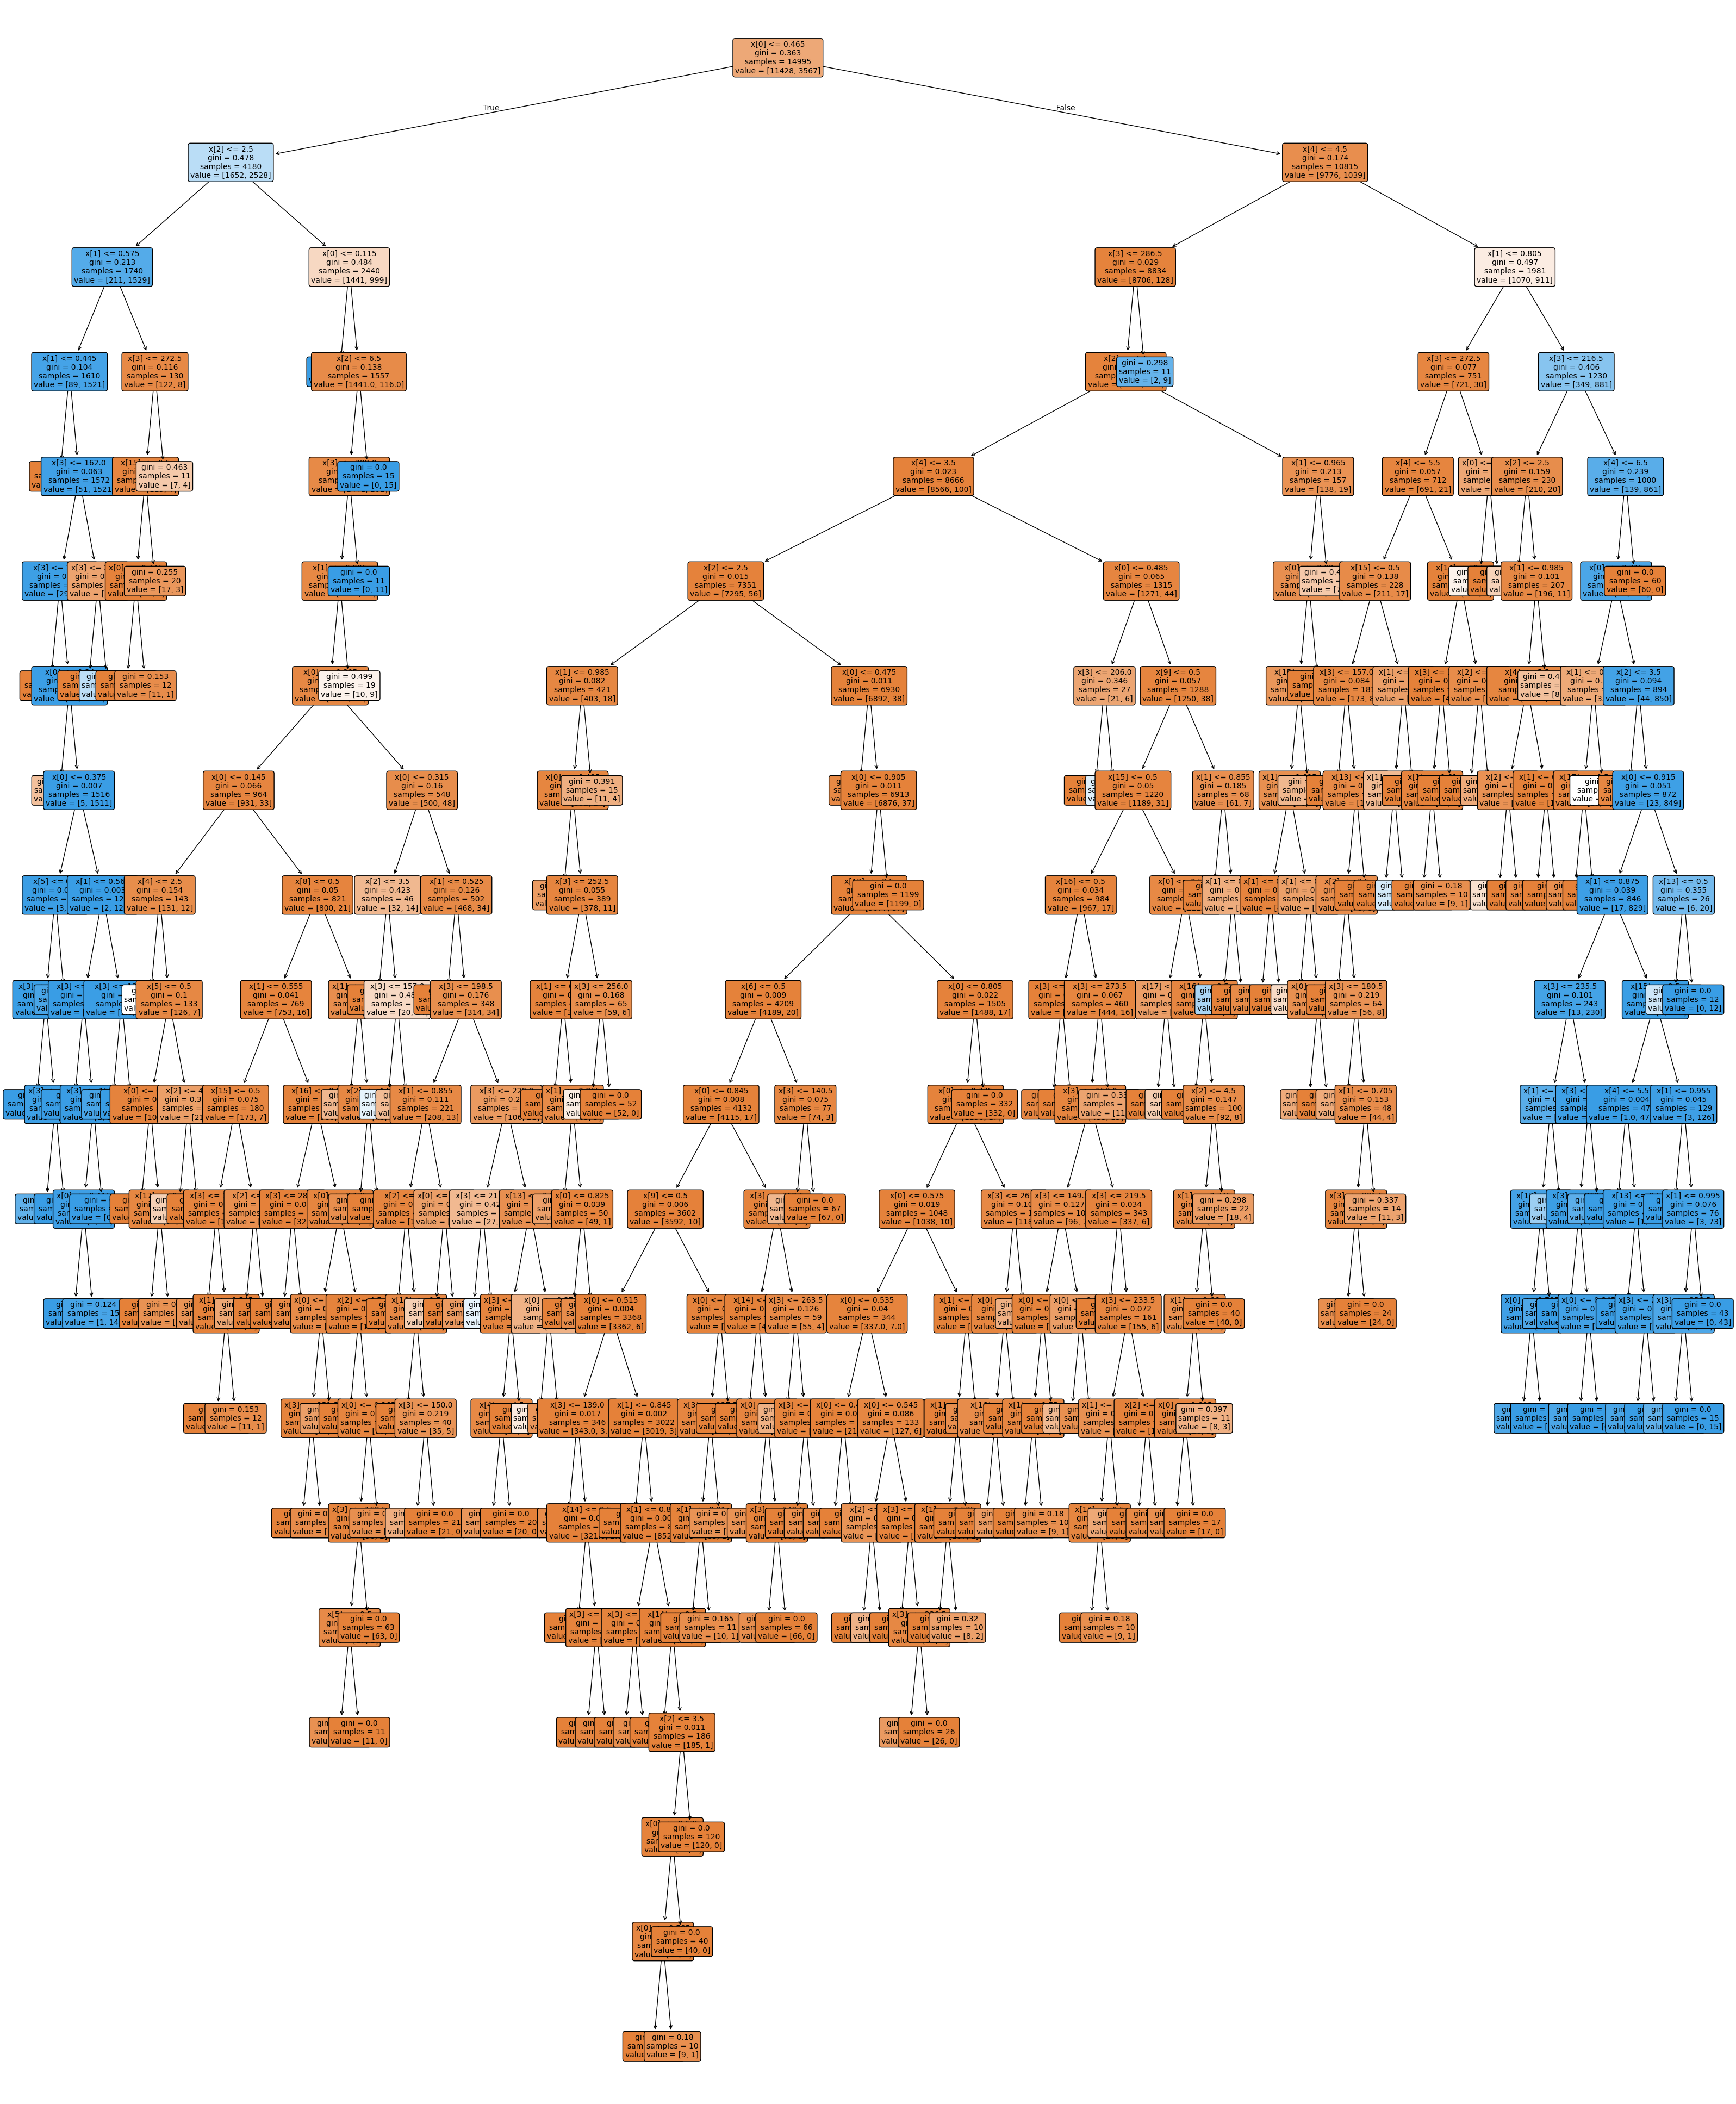

In [56]:
plt.figure(figsize=(40,50))
plot_tree(best_tree_model, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

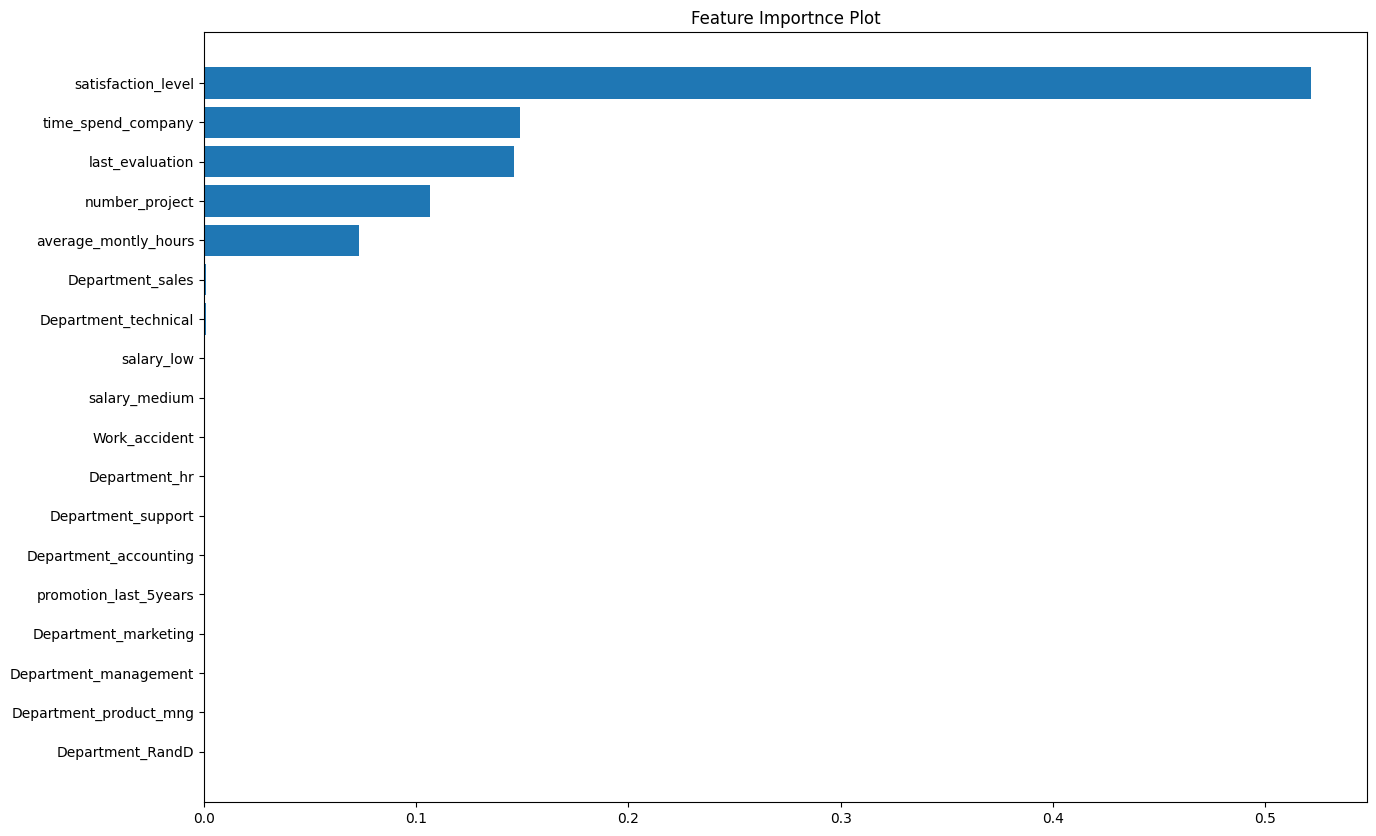

In [58]:
hr_imp = pd.DataFrame({'feature': list(gcv.best_estimator_.named_steps['CT'].get_feature_names_out()),
                      'importance':best_tree_model.feature_importances_})
hr_imp.sort_values('importance', inplace=True)
plt.figure(figsize=(15,10))
plt.barh(hr_imp['feature'], hr_imp['importance'])
plt.title("Feature Importnce Plot")
plt.show()

In [63]:
a = gcv.best_estimator_
a.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018B834E0AD0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018B8433DF70>)],
                                   verbose_feature_names_out=False)),
                ('DTC',
                 DecisionTreeClassifier(min_samples_leaf=10,
                                        min_samples_split=25,
                                        random_state=24))])>